In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from venny4py.venny4py import *
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, balanced_accuracy_score, classification_report


/tmp/ipykernel_2078212/3741777830.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Extract labeled relationship dataset
relationship2int = {"no": 0, "yes": 1}	
labeled_abstracts_df = pd.read_csv("../../data/preprocessed_abstracts_1000.csv", header=2)
labeled_abstracts_df = labeled_abstracts_df.loc[:, ~labeled_abstracts_df.columns.str.contains("Unnamed:")]
labeled_abstracts_df = labeled_abstracts_df.drop(index=[0,1]).reset_index(drop=True)
labeled_abstracts_df = labeled_abstracts_df.dropna(subset="relationship")
labeled_abstracts_df = labeled_abstracts_df.loc[:, ~labeled_abstracts_df.columns.str.contains("Unnamed:")]
labeled_abstracts_df["relationship"] = labeled_abstracts_df["relationship"].map(relationship2int.get)
labeled_abstracts_df.head()

,pmid,pathogen_term,disease_term,abstract_read,relationship,causality,controversy,model_article
600,33394202.0,{'human papillomavirus'},{'cancer'},Background: cervical intraepithelial neoplasia...,0,NaN,NaN,NaN
601,19155033.0,{'hepatovirus a'},{'hepatitis'},Hepatitis a in most developing countries is a ...,0,NaN,NaN,NaN
602,36328476.0,{'varicellovirus humanalpha3'},{'hepatitis c'},Objectives: to develop eular recommendations f...,0,NaN,NaN,NaN
603,35814366.0,{'human papillomavirus'},{'cancer'},"Objective: to determine the efficacy, safety, ...",0,NaN,NaN,NaN
604,3440745.0,{'staphylococcus aureus'},{'rubella'},The use of sam for the detection of rubella-sp...,0,NaN,NaN,NaN


In [3]:
#reverse stupid labeling, should be removed for newly run data; see comments in scripts/openai_query.py
result0to1to0 = {0: 1, 1: 0}
result_df = pd.read_csv("../../data/result_1000.csv")
result_df = result_df.loc[:, ~result_df.columns.str.contains("Unnamed:")]
result_df.loc[:, result_df.columns.str.contains("int")] = result_df.loc[:, result_df.columns.str.contains("int")].applymap(result0to1to0.get)
result_df.head()

/tmp/ipykernel_2078212/3792767229.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df.loc[:, result_df.columns.str.contains("int")] = result_df.loc[:, result_df.columns.str.contains("int")].applymap(result0to1to0.get)


,abstract,disease,pathogen,query_key,query,pmid,doi,title,journal,publication_date_pubmed,...,query_gpt-4,answer_gpt-4,query_Llama-2-70b-instruct-v2,answer_Llama-2-70b-instruct-v2,query_Mixtral-8x7B-Instruct-v0.1,answer_Mixtral-8x7B-Instruct-v0.1,answer_gpt-3.5-turbo_int,answer_gpt-4_int,answer_Llama-2-70b-instruct-v2_int,answer_Mixtral-8x7B-Instruct-v0.1_int
0,a 4-year-old felv-positive cat with a 1-year h...,diarrhea,cryptosporidium sp.,"diarrhea,Cryptosporidium sp.","(""diarrhea""[TIAB] OR ""diarrhoea""[TIAB] OR ""dia...",2824411,NaN,NaN,NaN,1987/09/15,...,Abstract: a 4-year-old felv-positive cat with ...,relationship,\n You will be provided with the abstra...,relationship,\n You will be provided with the abstra...,relationship,1.0,1.0,1,1.0
1,background: artemisinin resistance observed in...,malaria,plasmodium berghei,"malaria,Plasmodium berghei","(""malaria""[TIAB] OR ""induced malaria""[TIAB]) A...",27701420,10.1371/journal.pmed.1002138,NaN,NaN,2016/10/05,...,Abstract: background: artemisinin resistance o...,relationship,\n You will be provided with the abstra...,relationship,\n You will be provided with the abstra...,relationship,1.0,1.0,1,1.0
2,virus-specific t-cell responses can limit immu...,acquired immunodeficiency syndrome,vaccinia virus,"acquired immunodeficiency syndrome,Vaccinia virus","(""acquired immunodeficiency syndrome""[TIAB] OR...",16188989,NaN,NaN,NaN,2005/09/29,...,Abstract: virus-specific t-cell responses can ...,unrelated,\n You will be provided with the abstra...,relationship,\n You will be provided with the abstra...,unrelated,1.0,0.0,1,0.0
3,"new-born calves receiving no colostrum, or els...",pneumonia,escherichia coli,"pneumonia,Escherichia coli","(""pneumonia""[TIAB] OR ""acute pneumonia""[TIAB])...",19868978,NaN,NaN,NaN,1925/01/01,...,Abstract: new-born calves receiving no colostr...,inconclusive,\n You will be provided with the abstra...,relationship,\n You will be provided with the abstra...,unrelated,1.0,1.0,1,0.0
4,ticks are obligate hematophagous arthropods an...,encephalitis,brucella canis,"encephalitis,Brucella canis","""encephalitis""[TIAB] AND (""Brucella canis""[TIA...",32560202,10.3390/microorganisms8060910,NaN,NaN,2020/06/21,...,Abstract: ticks are obligate hematophagous art...,unrelated,\n You will be provided with the abstra...,unrelated,\n You will be provided with the abstra...,unrelated,1.0,0.0,0,0.0


In [4]:
# Combine labeled data with predicted data to evaluate models
prediction_df = result_df.merge(labeled_abstracts_df, on="pmid", how="inner")
prediction_df = prediction_df.filter(regex='int|relationship|model_article|abstract_read_x|disease_term_x|pathogen_term_x')
prediction_df.head()
#prediction_df = prediction_df.dropna(subset="model_article")
#prediction_df = prediction_df[prediction_df["model_article"].eq("spurious")]

#prediction_df.drop_duplicates(subset=["answer_gpt-3.5-turbo_int", "answer_gpt-4_int", "answer_Llama-2-70b-instruct-v2_int", "answer_Mixtral-8x7B-Instruct-v0.1_int"])
#prediction_df = prediction_df[~prediction_df[["answer_gpt-3.5-turbo_int", "answer_gpt-4_int","answer_Llama-2-70b-instruct-v2_int", "answer_Mixtral-8x7B-Instruct-v0.1_int"]].eq(1).all(axis=1)]
#prediction_df = prediction_df[~prediction_df[["answer_gpt-3.5-turbo_int", "answer_gpt-4_int"]].eq(0).all(axis=1)]
#prediction_df.to_csv("../../data/filtered_prediction_list.csv")
#prediction_df

,disease_term_x,pathogen_term_x,abstract_read_x,answer_gpt-3.5-turbo_int,answer_gpt-4_int,answer_Llama-2-70b-instruct-v2_int,answer_Mixtral-8x7B-Instruct-v0.1_int,relationship,model_article
0,{'cancer'},{'human papillomavirus'},Background: cervical intraepithelial neoplasia...,1.0,1.0,1,0.0,0,NaN
1,{'hepatitis'},{'hepatovirus a'},Hepatitis a in most developing countries is a ...,1.0,1.0,1,1.0,0,NaN
2,{'hepatitis c'},{'varicellovirus humanalpha3'},Objectives: to develop eular recommendations f...,1.0,1.0,0,0.0,0,NaN
3,{'cancer'},{'human papillomavirus'},"Objective: to determine the efficacy, safety, ...",1.0,1.0,1,1.0,0,NaN
4,{'rubella'},{'staphylococcus aureus'},The use of sam for the detection of rubella-sp...,1.0,0.0,0,0.0,0,NaN


In [5]:
#evaluate all model based on the labeled data

evaluation_dict = {}
labels = prediction_df["relationship"].to_numpy()

for model in prediction_df.filter(regex='int').columns:
    model_pred = prediction_df[model].to_numpy()
    tn, fp, fn, tp = confusion_matrix(labels, model_pred).ravel()
    specificity = tn / (tn+fp)
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    npv = tn / (tn+fn)
    roc_auc = roc_auc_score(labels, model_pred)
    evaluation_dict[model.replace("_int", "").replace("answer_", "")] = [roc_auc.round(2), precision.round(2), recall.round(2),  specificity.round(2), npv.round(2)]

evaluation_dict
evaluation_df = pd.DataFrame.from_dict(evaluation_dict)
evaluation_df.index = ["ROC-AUC", "Precision", "Recall", "Specificity", "Negative Predictive Value"]
evaluation_df.T.to_csv("../../data/evaluation_result.csv")
evaluation_df.T

,ROC-AUC,Precision,Recall,Specificity,Negative Predictive Value
gpt-3.5-turbo,0.51,0.38,0.98,0.05,0.79
gpt-4,0.62,0.44,0.92,0.32,0.88
Llama-2-70b-instruct-v2,0.69,0.52,0.85,0.52,0.86
Mixtral-8x7B-Instruct-v0.1,0.70,0.57,0.73,0.67,0.81


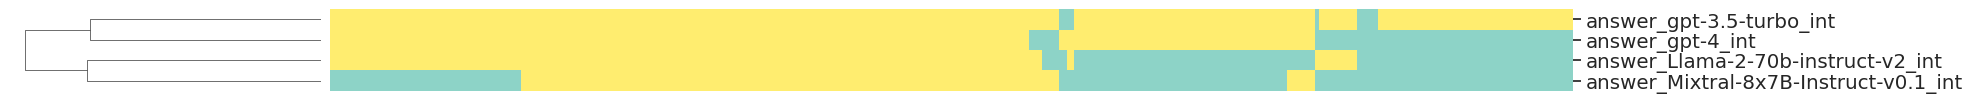

In [6]:
#heatmap_df = result_df.filter(regex='int')
#print(heatmap_df)
sns.set(font_scale=1.3)
#fig, ax = plt.subplots(figsize=(15, 5))

#result_pivot =result_df.pivot_table(index=heatmap_df.index, columns=heatmap_df.columns)
#print(result_pivot)
clust_map = sns.clustermap(result_df.filter(regex='int').T, cbar_pos=None, xticklabels=True, figsize=(20,2), cmap="Set3") 
clust_map.ax_heatmap.set_xticklabels([])
clust_map.ax_col_dendrogram.set_visible(False)
#ax.invert_yaxis()

#ax.set_aspect("equal")

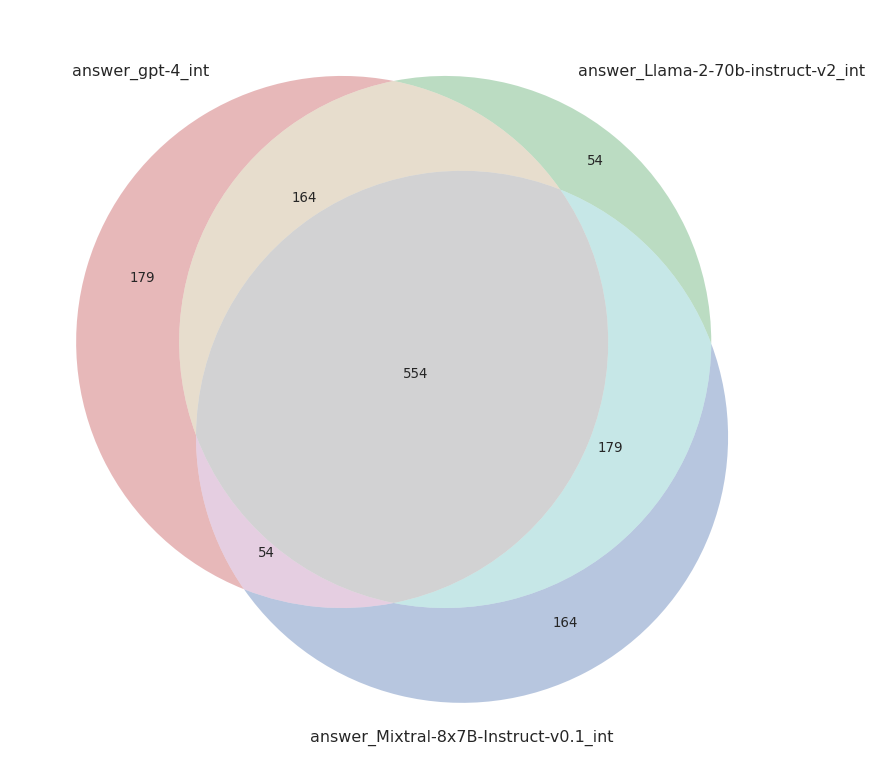

In [17]:
sns.set(font_scale=0.4)
result_df = result_df.filter(regex='int')
labels_sets_set = {}
labels_sets_list = [] 
for i, col in enumerate(result_df.columns):
    label_set = set([(i, int(row[col])) for i, row in result_df.iterrows()])
    if i == 0:
        labels_sets_set[col] = label_set
        continue
    labels_sets_list.append(label_set)
    labels_sets_set[col] = label_set
    
    
#labels_sets[1]
venn3(labels_sets_list, set_labels = result_df.columns[1:])

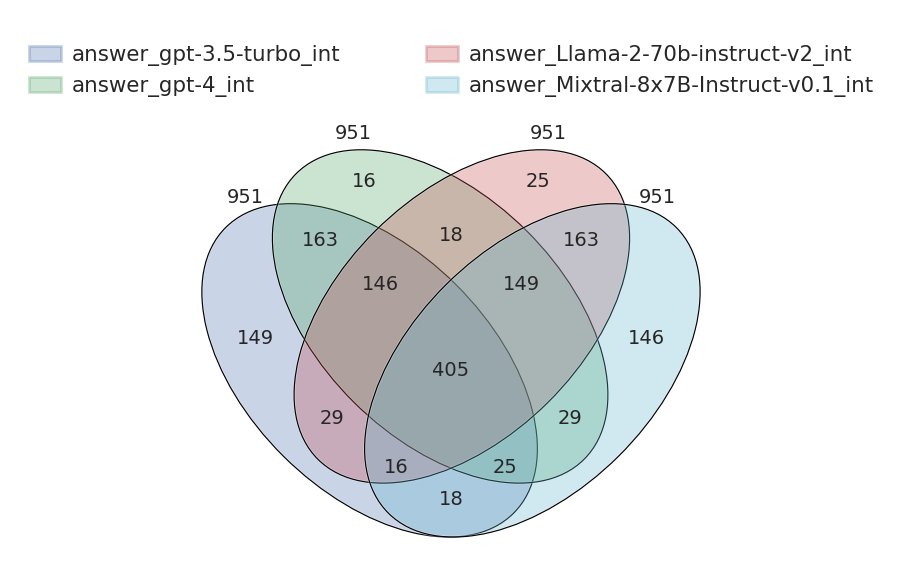

In [18]:
venny4py(labels_sets_set)